In [199]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Задание 1. Первичный анализ данных c Pandas

В этом заданиии мы будем использовать данные SOCR по росту и весу 25 тысяч подростков.

Считаем данные по росту и весу в объект Pandas DataFrame:

In [21]:
data = pd.read_csv('weights_heights.csv', index_col='Index')
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25000 entries, 1 to 25000
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Height  25000 non-null  float64
 1   Weight  25000 non-null  float64
dtypes: float64(2)
memory usage: 585.9 KB


,Height,Weight
Index,,
1,65.78331,112.9925
2,71.51521,136.4873
3,69.39874,153.0269
4,68.21660,142.3354
5,67.78781,144.2971


Cтоит построить гистограммы распределения признаков - это опять-таки позволяет понять природу признака (степенное у него распределение, или нормальное, или какое-то еще). Также благодаря гистограмме можно найти какие-то значения, сильно не похожие на другие - "выбросы" в данных. 
Гистограммы удобно строить методом *plot* Pandas DataFrame с аргументом *kind='hist'*.

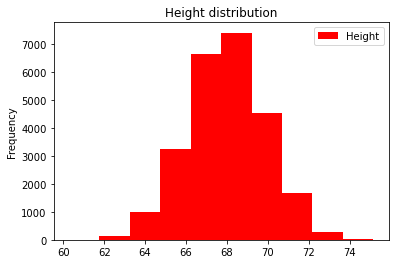

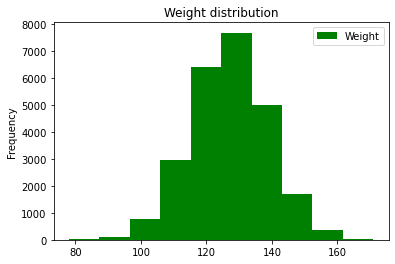

In [22]:
data.plot(y='Height', kind='hist', 
          color='red', title='Height distribution')
data.plot(y='Weight', kind='hist', 
          color='green', title='Weight distribution')
plt.show()

### 𝑠𝑐𝑎𝑡𝑡𝑒𝑟_𝑚𝑎𝑡𝑟𝑖𝑥
Один из эффективных методов первичного анализа данных - отображение попарных зависимостей признаков. Создается $m \times m$ графиков (*m* - число признаков), где по диагонали рисуются гистограммы распределения признаков, а вне диагонали - scatter plots зависимости двух признаков. Это можно делать с помощью метода $scatter\_matrix$ Pandas Data Frame или *pairplot* библиотеки Seaborn. 

Чтобы проиллюстрировать этот метод, интересней добавить третий признак. Создадим признак *Индекс массы тела* ([BMI](https://en.wikipedia.org/wiki/Body_mass_index)). Для этого воспользуемся удобной связкой метода *apply* Pandas DataFrame и lambda-функций Python.

In [23]:
def make_bmi(height_inch, weight_pound):
    METER_IN_INCH, KILO_IN_POUND = 39.37, 2.20462
    return (weight_pound / KILO_IN_POUND) /\
            (height_inch / METER_IN_INCH) ** 2

In [31]:
# Trying to find out how it works
print(data.apply(np.sum, axis=0))
print(data.apply(np.sum, axis=1).head())
print(data.apply(lambda row: (row['Height'] + row['Weight']), axis=1).head())

Height    1.699828e+06
Weight    3.176986e+06
dtype: float64
Index
1    178.77581
2    208.00251
3    222.42564
4    210.55200
5    212.08491
dtype: float64
Index
1    178.77581
2    208.00251
3    222.42564
4    210.55200
5    212.08491
dtype: float64


In [32]:
# pandas.dataframe.apply(...)
# axis=0 - apply function to all rows (by each column)
# axis=1 - apply function to all columns (by each row)
data['BMI'] = data.apply(lambda row: make_bmi(row['Height'], 
                                              row['Weight']), axis=1)
data.head()

,Height,Weight,BMI
Index,,,
1,65.78331,112.9925,18.357573
2,71.51521,136.4873,18.762577
3,69.39874,153.0269,22.338895
4,68.21660,142.3354,21.504526
5,67.78781,144.2971,22.077581


Постройте картинку, на которой будут отображены попарные зависимости признаков , 'Height', 'Weight' и 'BMI' друг от друга. Используйте метод *pairplot* библиотеки Seaborn.

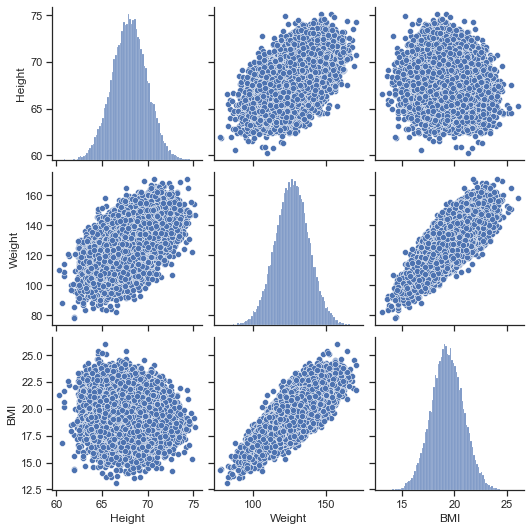

In [39]:
sns.pairplot(data)

#### Box plot
Box plot - это компактный способ показать статистики вещественного признака (среднее и квартили) по разным значениям категориального признака. Также помогает отслеживать "выбросы" - наблюдения, в которых значение данного вещественного признака сильно отличается от других. 

***Задание***
Создайте в DataFrame *data* новый признак *weight_category*, который будет иметь 3 значения: 1 – если вес меньше 120 фунтов. (~ 54 кг.), 3 - если вес  больше или равен 150 фунтов (~68 кг.), 2 – в остальных случаях. Постройте «ящик с усами» (boxplot), демонстрирующий зависимость роста от весовой категории. Используйте метод *boxplot* библиотеки Seaborn и метод *apply* Pandas DataFrame. Подпишите ось *y* меткой «Рост», ось *x* – меткой «Весовая категория».

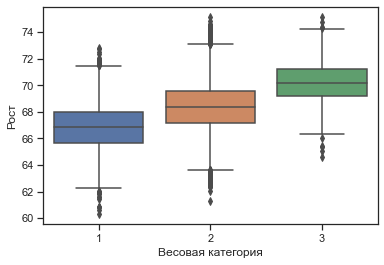

In [55]:
def weight_category(weight):
    if weight < 120:
        return 1
    elif weight >= 150:
        return 3
    return 2

data['weight_cat'] = data['Weight'].apply(weight_category)

sns.boxplot(x=data['weight_cat'], y=data['Height'])
plt.ylabel('Рост')
plt.xlabel('Весовая категория')
plt.show()

Постройте scatter plot зависимости роста от веса, используя метод plot для Pandas DataFrame с аргументом kind='scatter'. Подпишите картинку.

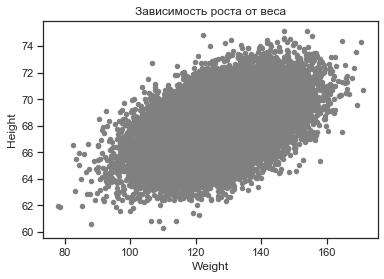

In [70]:
data.plot(x = 'Weight',
          y = 'Height',
          color = 'grey',
          kind = 'scatter',
          title = 'Зависимость роста от веса')
plt.show()

## Задание 2. Минимизация квадратичной ошибки

В простейшей постановке задача прогноза значения вещественного признака по прочим признакам (задача восстановления регрессии) решается минимизацией квадратичной функции ошибки. 

**[6].** Напишите функцию, которая по двум параметрам $w_0$ и $w_1$ вычисляет квадратичную ошибку приближения зависимости роста $y$ от веса $x$ прямой линией $y = w_0 + w_1 * x$:
$$error(w_0, w_1) = \sum_{i=1}^n {(y_i - (w_0 + w_1 * x_i))}^2 $$
Здесь $n$ – число наблюдений в наборе данных, $y_i$ и $x_i$ – рост и вес $i$-ого человека в наборе данных. 

In [151]:
def squared_error_v1(w0, w1):
    sum = 0
    for i in range(1, data.shape[0] + 1):
        sum += (data.Height[i] - (w0 + w1 * data.Weight[i])) ** 2
    return sum

def error(w0, w1, x, y):
    return (y - (w0 + w1 * x)) ** 2

def squared_error_v2(w0, w1):
    return sum(
        data.apply(
            lambda row:
                (row['Height'] - (w0 + w1 * row['Weight'])) ** 2,
            axis = 1
        )
    )
    
def squared_error_v3(w0, w1):
    return sum(
        ((data.Height[i] - (w0 + w1 * data.Weight[i]))**2) 
        for i in range(1, data.shape[0] + 1)
    )

squared_error = squared_error_v2

In [127]:
print(squared_error_v1(60,0.05))
print(squared_error_v2(60,0.05))
print(squared_error_v3(60,0.05))

138197.37942816826
138197.37942816826
138197.37942816826


Итак, мы решаем задачу: как через облако точек, соответсвующих наблюдениям в нашем наборе данных, в пространстве признаков "Рост" и "Вес" провести прямую линию так, чтобы минимизировать функционал из п. 6. Для начала давайте отобразим хоть какие-то прямые и убедимся, что они плохо передают зависимость роста от веса.

**[7].** Проведите на графике из п. 5 Задания 1 две прямые, соответствующие значениям параметров ($w_0, w_1) = (60, 0.05)$ и ($w_0, w_1) = (50, 0.16)$. Используйте метод *plot* из *matplotlib.pyplot*, а также метод *linspace* библиотеки NumPy. Подпишите оси и график.

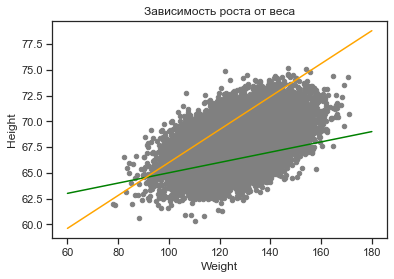

In [136]:
def y(w0, w1, x):
    return w0 + w1 * x

data.plot(x = 'Weight',
          y = 'Height',
          kind = 'scatter',
          title = 'Зависимость роста от веса',
          color = 'grey')
x = np.linspace(60, 180, 160)
plt.plot(x, y(60, 0.05, x), color = 'green')
plt.plot(x, y(50, 0.16, x), color = 'orange')
plt.show()

Минимизация квадратичной функции ошибки - относительная простая задача, поскольку функция выпуклая. Для такой задачи существует много методов оптимизации. Посмотрим, как функция ошибки зависит от одного параметра (наклон прямой), если второй параметр (свободный член) зафиксировать.

**[8].** Постройте график зависимости функции ошибки, посчитанной в п. 6, от параметра $w_1$ при $w_0$ = 50. Подпишите оси и график.

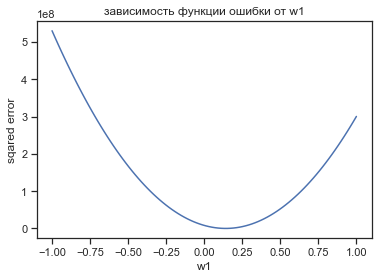

In [189]:
w1 = np.linspace(-1, 1, 100)
plt.plot(w1, squared_error_v2(50, w1))
plt.xlabel('w1')
plt.ylabel('sqared error')
plt.title('зависимость функции ошибки от w1')
plt.show()

Теперь методом оптимизации найдем "оптимальный" наклон прямой, приближающей зависимость роста от веса, при фиксированном коэффициенте $w_0 = 50$.

**[9].** С помощью метода *minimize_scalar* из *scipy.optimize* найдите минимум функции, определенной в п. 6, для значений параметра  $w_1$ в диапазоне [-5,5]. Проведите на графике из п. 5 Задания 1 прямую, соответствующую значениям параметров ($w_0$, $w_1$) = (50, $w_1\_opt$), где $w_1\_opt$ – найденное в п. 8 оптимальное значение параметра $w_1$. 

In [190]:
from scipy.optimize import minimize_scalar

In [191]:
w0 = 50
w1 = minimize_scalar(
    lambda w1: squared_error(w0, w1), 
    bounds=(-5, 5), 
    method='bounded').x

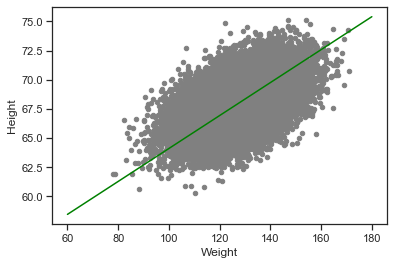

In [192]:
data.plot(
    x = 'Weight',
    y = 'Height',
    kind = 'scatter',
    color = 'grey')

x = np.linspace(60, 180, 100)
plt.plot(x, y(w0, w1, x), color = 'green')

При анализе многомерных данных человек часто хочет получить интуитивное представление о природе данных с помощью визуализации. Увы, при числе признаков больше 3 такие картинки нарисовать невозможно. На практике для визуализации данных в 2D и 3D в данных выделаяют 2 или, соответственно, 3 главные компоненты (как именно это делается - мы увидим далее в курсе) и отображают данные на плоскости или в объеме. 

Постройте 3D-график зависимости функции ошибки, посчитанной в п.6 от параметров $w_0$ и $w_1$. Подпишите ось $x$ меткой «Intercept», ось $y$ – меткой «Slope», a ось $z$ – меткой «Error».

In [193]:
from mpl_toolkits.mplot3d import Axes3D

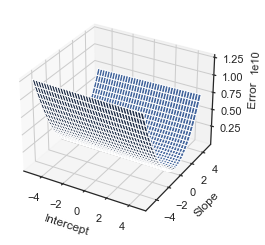

In [194]:
# Создаем объекты типа matplotlib.figure.Figure (рисунок) 
# и  matplotlib.axes._subplots.Axes3DSubplot (ось).

fig = plt.figure()
ax = fig.gca(projection='3d')

X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
Z = squared_error(X, Y)

surf = ax.plot_surface(X, Y, Z)
ax.set_xlabel('Intercept')
ax.set_ylabel('Slope')
ax.set_zlabel('Error')
plt.show()

С помощью метода minimize из scipy.optimize найдите минимум функции, определенной в п. 6, для значений параметра  𝑤0  в диапазоне [-100,100] и  𝑤1  - в диапазоне [-5, 5]. Начальная точка – ( 𝑤0 ,  𝑤1 ) = (0, 0). Используйте метод оптимизации L-BFGS-B (аргумент method метода minimize). Проведите на графике из п. 5 Задания 1 прямую, соответствующую найденным оптимальным значениям параметров  𝑤0  и  𝑤1 . Подпишите оси и график.

In [195]:
from scipy.optimize import minimize

In [196]:
minimum = minimize(
    fun = lambda w: squared_error(w[0], w[1]),
    x0 = np.array([0, 0]),
    method = 'L-BFGS-B',
    bounds = ( (-100, 100), (-5, 5) ),
)

In [197]:
minimum

      fun: 67545.28708530961
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([-0.02328306, -0.28521754])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 45
      nit: 9
     njev: 15
   status: 0
  success: True
        x: array([57.57169859,  0.0820071 ])

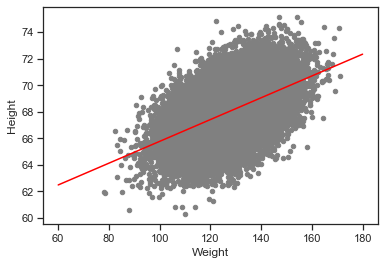

In [198]:
data.plot(
    x = 'Weight',
    y = 'Height',
    kind = 'scatter',
    color = 'grey'
)

x = np.linspace(60, 180, 100)
plt.plot(x, 
         y(minimum.x[0], minimum.x[1], x),
         color = 'red')